# For data manipulation

In [33]:
import pandas as pd

import numpy as np


# sql import

In [34]:
import psycopg2
import datetime


# Load dataset Read sqlite query results into a pandas DataFrame

In [35]:
### Database connection

conn_string = "host='localhost' dbname='stockmarket' user='postgres' password='123456'"
conn = psycopg2.connect(conn_string)

## Read dataset

df = pd.read_sql_query(
    '''select i.date ,i.open ,i.high ,i.low ,i.close ,i.adj_close ,i.volume ,c.name
    from information i 
    join company c
    on i.company_id=c.id
    where company_id = {}'''.format(3)  , conn, index_col='date')
df.index = pd.to_datetime(df.index)


# Verify that result of SQL query is stored in the dataframe


In [36]:
print(df.head())

                open      high       low     close  adj_close      volume  \
date                                                                        
1986-03-12  0.444196  0.448661  0.441964  0.441964   0.020108  21420000.0   
1986-03-13  0.441964  0.446429  0.435268  0.441964   0.020108  28991200.0   
1986-03-14  0.441964  0.468750  0.441964  0.466518   0.021225  96213600.0   
1986-03-17  0.464286  0.464286  0.453125  0.464286   0.021123  29680000.0   
1986-03-18  0.464286  0.486607  0.462054  0.479911   0.021834  62339200.0   

            name  
date              
1986-03-12  AAPL  
1986-03-13  AAPL  
1986-03-14  AAPL  
1986-03-17  AAPL  
1986-03-18  AAPL  


## adding  features

In [37]:
conn.close()

df= df.dropna()

df['open-close'] = df.open - df.close

df['high-low'] = df.high - df.low

# Simple Moving Average 


In [38]:
def SMA(data, ndays): 
 SMA = pd.Series(pd.rolling_mean(data['close'], ndays), name = 'SMA') 
 data = data.join(SMA) 
 return data


# Exponentially-weighted Moving Average 


In [39]:
def EWMA(data, ndays): 
 EMA = pd.Series(pd.ewma(data['close'], span = ndays, min_periods = ndays - 1), 
 name = 'EWMA_' + str(ndays)) 
 data = data.join(EMA) 
 return data

# Retrieve the company data for a certain period:


In [40]:
data = df

close = data['close']

print(data.head(),'\n\n\n',close.head())

                open      high       low     close  adj_close      volume  \
date                                                                        
1986-03-12  0.444196  0.448661  0.441964  0.441964   0.020108  21420000.0   
1986-03-13  0.441964  0.446429  0.435268  0.441964   0.020108  28991200.0   
1986-03-14  0.441964  0.468750  0.441964  0.466518   0.021225  96213600.0   
1986-03-17  0.464286  0.464286  0.453125  0.464286   0.021123  29680000.0   
1986-03-18  0.464286  0.486607  0.462054  0.479911   0.021834  62339200.0   

            name  open-close  high-low  
date                                    
1986-03-12  AAPL    0.002232  0.006697  
1986-03-13  AAPL    0.000000  0.011161  
1986-03-14  AAPL   -0.024554  0.026786  
1986-03-17  AAPL    0.000000  0.011161  
1986-03-18  AAPL   -0.015625  0.024553   


 date
1986-03-12    0.441964
1986-03-13    0.441964
1986-03-14    0.466518
1986-03-17    0.464286
1986-03-18    0.479911
Name: close, dtype: float64


# Compute the 50-day SMA for the company


In [41]:
n = 50
SMA_COMPANY = SMA(data,n)
SMA_COMPANY = SMA_COMPANY.dropna()
SMA = SMA_COMPANY['SMA']
print(SMA)

date
1986-05-21      0.534152
1986-05-22      0.538438
1986-05-23      0.542813
1986-05-27      0.546652
1986-05-28      0.550670
1986-05-29      0.554286
1986-05-30      0.558036
1986-06-02      0.561205
1986-06-03      0.564866
1986-06-04      0.569152
1986-06-05      0.573080
1986-06-06      0.576473
1986-06-09      0.579241
1986-06-10      0.582009
1986-06-11      0.585179
1986-06-12      0.588304
1986-06-13      0.591652
1986-06-16      0.594911
1986-06-17      0.597411
1986-06-18      0.599777
1986-06-19      0.602589
1986-06-20      0.605714
1986-06-23      0.608482
1986-06-24      0.611339
1986-06-25      0.614375
1986-06-26      0.617232
1986-06-27      0.619687
1986-06-30      0.621875
1986-07-01      0.623661
1986-07-02      0.625893
                 ...    
2018-01-30    172.946000
2018-01-31    172.872600
2018-02-01    172.825200
2018-02-02    172.635600
2018-02-05    172.302600
2018-02-06    172.064000
2018-02-07    171.755400
2018-02-08    171.376600
2018-02-09    171.04

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()



# Compute the 200-day EWMA for company


In [42]:
ew = 200
EWMA_COMPANY = EWMA(data,ew)
EWMA_COMPANY = EWMA_COMPANY.dropna()
EWMA = EWMA_COMPANY['EWMA_200']
print(EWMA)

date
1986-12-22      0.637423
1986-12-23      0.638745
1986-12-24      0.639997
1986-12-26      0.641054
1986-12-29      0.641996
1986-12-30      0.643027
1986-12-31      0.643942
1987-01-02      0.644923
1987-01-05      0.646323
1987-01-06      0.647857
1987-01-07      0.649574
1987-01-08      0.651270
1987-01-09      0.653070
1987-01-12      0.654873
1987-01-13      0.656476
1987-01-14      0.658764
1987-01-15      0.661376
1987-01-16      0.663728
1987-01-19      0.666929
1987-01-20      0.669789
1987-01-21      0.672088
1987-01-22      0.675058
1987-01-23      0.677542
1987-01-26      0.679896
1987-01-27      0.682818
1987-01-28      0.686225
1987-01-29      0.689343
1987-01-30      0.692695
1987-02-02      0.696080
1987-02-03      0.699350
                 ...    
2018-01-30    158.652303
2018-01-31    158.739643
2018-02-01    158.829597
2018-02-02    158.846218
2018-02-05    158.822773
2018-02-06    158.864636
2018-02-07    158.871356
2018-02-08    158.834327
2018-02-09    158.81

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=200,min_periods=199,adjust=True,ignore_na=False).mean()



# Plotting the COMPANY Price Series chart and Moving Averages below


In [43]:
import plotly
#import plotly.graph_objs as go
from plotly.graph_objs import *
#import plotly.figure_factory as ff
# Must enable in order to use plotly off-line (vs. in the cloud... hate cloud)
plotly.offline.init_notebook_mode()

In [44]:
trace_close = Scatter(
    x=df.index,
    y=df['adj_close'],
    name='adj_close_price',
    mode='lines'
)
trace_SMA = Scatter(
    x=df.index,
    y=SMA,
    name='50-day SMA (red)',
    mode='lines'
)
trace_EWMA = Scatter(
    x=df.index,
    y=EWMA,
    name='200-day EWMA (green)',
    mode='lines'
)
layout = Layout(
    title='Moving Average',
    xaxis=dict(
            tickangle=45,     
        rangeselector=dict(
            buttons=list([
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    ),
    yaxis=dict( title='Price',tickprefix='$'),
    
)
#dict(range = ['2015-07-01','2017-12-31']),
data = Data([trace_close,trace_SMA,trace_EWMA])
fig = Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='MOVING_AVERAGE')
plotly.offline.plot(fig, filename='MOVING_AVERAGE')
#plotly.offline.plot() #for html


C:\Anaconda3\lib\site-packages\plotly\offline\offline.py:459: UserWarning:

Your filename `MOVING_AVERAGE` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Mohamed\\Desktop\\project\\MOVING_AVERAGE.html'

# To plot

In [45]:
import matplotlib.pyplot as plt

import seaborn

(array([724642., 726103., 727564., 729025., 730486., 731947., 733408.,
        734869., 736330.]), <a list of 9 Text xticklabel objects>)

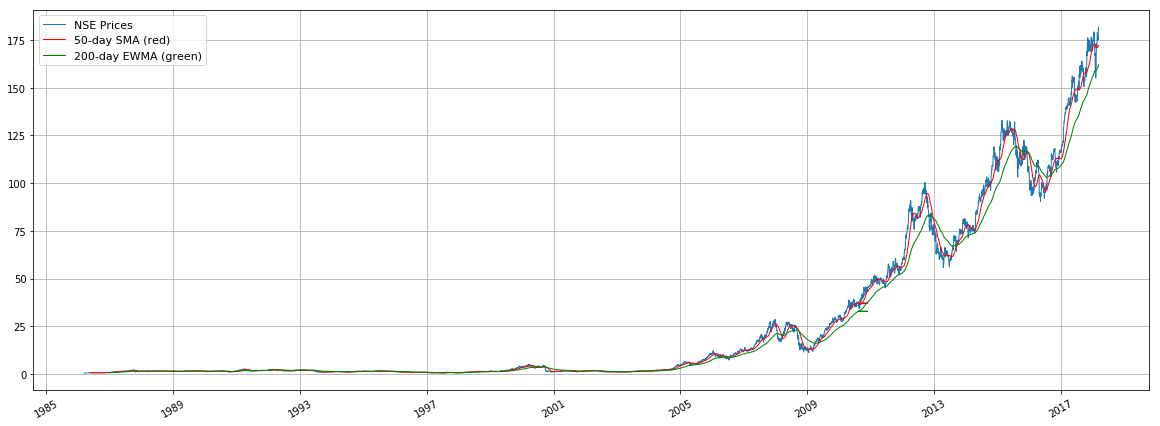

In [46]:
plt.figure(figsize=(20,7))
plt.plot(df['close'],lw=1, label='NSE Prices')
plt.plot(SMA,'r',lw=1, label='50-day SMA (red)')
plt.plot(EWMA,'g', lw=1, label='200-day EWMA (green)')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.xticks(rotation=30)